The data used in this analysis('data.csv') was provided by Allstate. It contains information from the event data recorder in a car driven by two drivers, Alan and Barbara. I will use pandas dataframe and matplotlib in the analysis and plotting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#open the csv file as a panads data frame
data = pd.read_csv('data.csv')

In [3]:
#check the header of the date
data.head()

,trip_id,driver,lon,lat,date,speed,direction,odometer,event
0,1,Alan,-122.128910,37.44529,2009-04-05 13:39:54,11.250,185,743984,N
1,1,Alan,-122.125960,37.44332,2009-04-05 13:40:24,18.750,117,744344,Y
2,1,Alan,-122.128170,37.44071,2009-04-05 13:40:54,38.125,218,744713,N
3,1,Alan,-122.131740,37.43711,2009-04-05 13:41:24,36.250,218,745222,N
4,1,Alan,-122.132805,37.43598,2009-04-05 13:41:54,0.000,218,745380,N


In [4]:
#Use describe to see the summary of the data. 
data.describe()

,trip_id,lon,lat,speed,direction,odometer
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,17.811321,-122.143143,37.474394,29.318249,182.304245,945930.562500
std,9.517635,0.062288,0.069050,22.649319,105.783441,108332.921639
min,1.000000,-122.396255,37.375282,0.000000,0.000000,743984.000000
25%,11.000000,-122.160122,37.430984,7.500000,92.000000,853884.250000
50%,18.000000,-122.128287,37.448755,28.125000,179.000000,939550.000000
75%,26.000000,-122.106390,37.487678,48.906250,288.000000,1056702.250000
max,34.000000,-122.038320,37.667690,75.000000,360.000000,1117071.000000


From the describe() method, we know there is 848 data points in this data set, which consists of 34 trips. The speed ranges from 0-75. Seems like there is no missing data. 

In [5]:
#Divide the dataset into two, one if Allen, and the other is Barbara
alan = data[data['driver']=='Alan']
barbara =data[data['driver']=='Barbara']

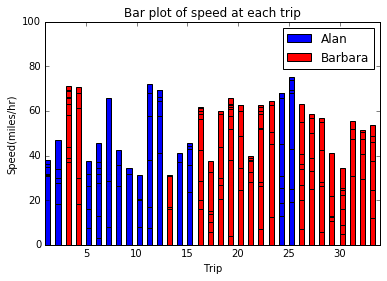

In [6]:
# let's plot all the speeds vs trip
fig = plt.figure()
rect1 = plt.bar(alan['trip_id'], alan['speed'], color = 'b', width = 0.5)
rect2 = plt.bar(barbara['trip_id'], barbara['speed'], color = 'r', width = 0.5)
plt.xlim(1,34)
plt.ylim(0, 100)
plt.xlabel('Trip')
plt.ylabel('Speed(miles/hr)')
plt.title('Bar plot of speed at each trip')
plt.legend((rect1[0], rect2[0]), ('Alan', 'Barbara'))

plt.show()

There are 14 trips listed for Alan, and 20 trips listed for Barbara. From this chart, we also know most Barbara's trips were on highway.

## Question1: Who is the safer driver?


In this dataset, each record also includes a field called “event”, which denotes whether the driver exceeded a pre-defined acceleration threshold at any point during that 30-second period. We assume that these events are correlated with risky driving behaviour. So first let plot these risky accelerations. This time I use a scatter plot.

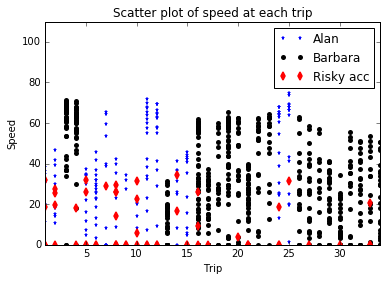

In [7]:
fig = plt.figure()
rect1 = plt.plot(alan['trip_id'], alan['speed'], linestyle = '',
         marker = '*',
         markersize = 5,
         markerfacecolor = 'Blue',
         markeredgewidth = 0) #plot Alan's trip is in blue
rect2 = plt.plot(barbara['trip_id'], barbara['speed'], linestyle = '',
         marker = 'o',
         markersize = 5,
         markerfacecolor = 'Black',
         markeredgewidth = 0)# Barbara's trip is in black
rect3 = plt.plot(data[data['event']=='Y']['trip_id'], data[data['event']=='Y']['speed'], linestyle = '',
         marker = 'd',
         markersize = 5,
         markerfacecolor = 'Red',
         markeredgewidth = 1.5,
         markeredgecolor = 'Red',)#The risky events are in red diamond shape
plt.xlim(1,34)
plt.ylim(0, 110)
plt.xlabel('Trip')
plt.ylabel('Speed')
plt.title('Scatter plot of speed at each trip')
plt.legend((rect1[0], rect2[0], rect3[0]), ('Alan', 'Barbara', 'Risky acc'))

plt.show()

## It is quite obvious Alan had more risky events in his trips. But how many did he have for each trip? Let's count them.

In [11]:
#first, let's save the trip_id into a list
def count_trip(trip_id):
    tripIdlist = []
    for item in trip_id:
        if item not in tripIdlist:
            tripIdlist.append(item)
    return tripIdlist

In [12]:
alanIdlist = count_trip(alan['trip_id'])
barbaraIdlist = count_trip(barbara['trip_id'])

In [13]:
#let's count the risky events in each trip and save them into a list
def count_risk(df, tripIdlist):
    riskAcc = []
    for trip in tripIdlist:
        riskCount = 0
        for event in df[df['trip_id']==trip]['event']:
            if event == 'Y':
                riskCount += 1
        riskAcc.append(riskCount)
    return riskAcc

In [14]:
alanRiskacc = count_risk(alan, alanIdlist)
barbaraRiskacc = count_risk(barbara, barbaraIdlist)

In [15]:
alanRiskacc

[4, 4, 4, 2, 1, 7, 2, 4, 2, 2, 2, 2, 3, 1]

In [16]:
barbaraRiskacc


[0, 2, 0, 3, 1, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0]

In [17]:
#Average risky events per trip for each driver
alanAveragerisk = np.average(alanRiskacc)
barbaraAveragerisk = np.average(barbaraRiskacc)
alanAveragerisk

2.8571428571428572

In [19]:
barbaraAveragerisk 

0.75

In [20]:
#we could also calculate the standard deviations of each drivers' risky events
alanRiskstd = np.std(alanRiskacc)
barbaraRiskstd = np.std(barbaraRiskacc)

In [21]:
alanRiskstd

1.5518257844571735

In [22]:
barbaraRiskstd


1.0897247358851685

In [26]:
# we could also do a little bit statistic test to comparing Alan and Barbara's risky events. Here I use unpaired t-test.
from scipy import stats
print stats.ttest_ind(alanRiskacc, barbaraRiskacc, equal_var = False)

Ttest_indResult(statistic=4.2334359801489621, pvalue=0.00035372121373734042)


# In average, Alan had two more risky events per trip comparing to Barbara. So Barbara is the safer driver.


# Question2: Between the trip 7, driven by Allen, and 13, driven by Barbara, who drove on the highway?


According to wikipedia, the high way speed limits in US is around 60-70 mph, let use the average 65 mph as a standard. I will use box plot to check which trip is likely on highway.

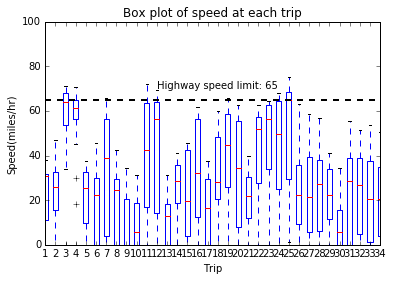

In [30]:
fig = plt.figure()
speed_data_to_plot = []
for i in range(1, 35):
    speed_data_to_plot.append(data[data['trip_id']== i]['speed']) # Group the speed data by trip_id
plt.boxplot(speed_data_to_plot)    
plt.xlim(1,34)
plt.ylim(0, 100)
plt.xlabel('Trip')
plt.ylabel('Speed(miles/hr)')
plt.title('Box plot of speed at each trip')

plt.plot([1,34], [65, 65], color = 'k', linestyle = '--', lw = 2)
plt.text(12, 70, 
         'Highway speed limit: 65') # Add a highway speed limit
plt.show()


# By looking at the chart, trip 7 is more likely to be highway drive comparing to trip 13.

In [32]:
# let's look at more details on trip 7 and trip 13
print "The average speed at trip 7 is ",  np.average(speed_data_to_plot[6])
print 'The max speed at trip 7 is' ,  np.max(speed_data_to_plot[6])
print "The average speed at trip 13 is ",  np.average(speed_data_to_plot[12])
print 'The max speed at trip 13 is' ,  np.max(speed_data_to_plot[12])

The average speed at trip 7 is  32.6136363636
The max speed at trip 7 is 65.625
The average speed at trip 13 is  11.3372093023
The max speed at trip 13 is 31.25


Again, trip 7 is more like to be highway drive.